In [2]:
import pandas as pd
import numpy as np
ds = pd.read_csv('Real_Bitcoin_Price_History_2015_2026.csv') 

In [3]:
ds.shape

(4021, 8)

In [4]:
ds.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
SMA_50          0
Daily_Return    0
dtype: int64

In [5]:
ds.iloc[0:15]

,Date,Open,High,Low,Close,Volume,SMA_50,Daily_Return
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,27384.657713,0.002032
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,27384.657713,0.002492
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,27384.657713,-0.107767
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,27384.657713,-0.060079
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,27384.657713,0.038907
5,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,27384.657713,0.042682
6,2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,27384.657713,0.028471
7,2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,27384.657713,-0.037331
8,2015-01-09,282.382996,291.114014,280.532990,290.407990,18718600,27384.657713,0.024913
9,2015-01-10,287.303009,288.127014,273.966003,274.795990,15264300,27384.657713,-0.053759


In [6]:
ds.duplicated().sum()

0

# DATA PREPARATION

In [8]:
dataset= ds.drop(columns=['Volume', 'SMA_50',]) 
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Daily_Return'], dtype='object')

In [11]:
dataset[dataset['Daily_Return']>0.24]

,Date,Open,High,Low,Close,Daily_Return
1071,2017-12-07,14266.099609,17899.699219,14057.299805,17899.699219,0.252472


In [15]:
dataset.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high','Low': 'low','Close':'close','Daily_Return': 'daily_return'}, inplace=True)
dataset.columns

Index(['date', 'open', 'high', 'low', 'close', 'daily_return'], dtype='object')

# data visualization 

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as pl
import plotly.graph_objects as go


In [16]:
fig = pl.scatter_3d(dataset, x='open', y='high', z='close',
                   color='high', size='high',
                   title='bitcoin price range',
                   labels={'open': 'open ($)', 'high': 'high ($)', 'low': 'low ($)'})
fig.show()

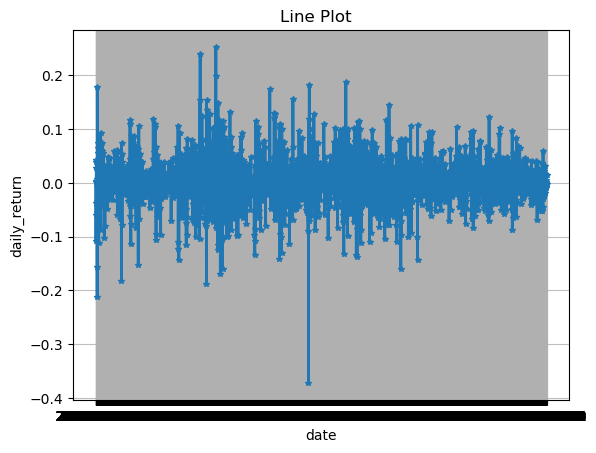

In [20]:
x = dataset['date']
y = dataset['daily_return']
plt.plot(x, y, marker='*', linewidth=2, markersize=4)
plt.title('Line Plot  ')
plt.xlabel('date')
plt.ylabel('daily_return')
plt.grid(True, alpha=0.8)
plt.show()

# MACHINE LEARNING MODEL

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
x = dataset[[ 'open', 'high', 'low', 'close']]  
y = dataset['daily_return'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(3216, 5)
(805, 5)
(805,)
(3216,)


In [31]:
df=dataset.drop(columns=['date'])
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#print(dataset['date'].dtype)

datetime64[ns]


In [32]:
# Multiple Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
lr_r2score = r2_score(y_test, lr_pred)

In [33]:
#  Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_r2score = r2_score(y_test, dt_pred)


In [34]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_r2score = r2_score(y_test, rf_pred)

In [35]:
print("R² Scores Comparison :")
print(f"Multiple Linear Regression: {lr_r2score:.3f}")
print(f"Decision Tree: {dt_r2score:.3f}")
print(f"Random Forest: {rf_r2score:.3f}")

best_model = max([('Linear', lr_r2score), ('Decision Tree', dt_r2score), ('Random Forest', rf_r2score)], 
                 key=lambda x: x[1])
print(f"BEST MODEL : {best_model[0]} (R² = {best_model[1]:.3%} )")

R² Scores Comparison :
Multiple Linear Regression: 0.424
Decision Tree: 0.001
Random Forest: 0.038
BEST MODEL : Linear (R² = 42.415% )
